In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read, write
from dynasor.qpoints import get_spherical_qpoints
from dynasor import compute_static_structure_factors, Trajectory
from dynasor.post_processing import get_spherically_averaged_sample_smearing 

/Users/w21013885/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/w21013885/XRD
here
INFO: Trajectory file: /Users/w21013885/XRD/md_runs/NVT_tet_size8_T620_nframes1000/dump.extxyz
INFO: Total number of particles: 10000
INFO: Number of atom types: 1
INFO: Number of atoms of type X: 10000
INFO: Simulation cell (in Angstrom):
[[-35.01611021  35.01611021  51.15551849]
 [ 35.01611021 -35.01611021  51.15551849]
 [ 35.01611021  35.01611021 -51.15551849]]
INFO: Number of q-points: 5364
[0.         0.003003   0.00600601 0.00900901 0.01201201 0.01501502
 0.01801802 0.02102102 0.02402402 0.02702703 0.03003003 0.03303303
 0.03603604 0.03903904 0.04204204 0.04504505 0.04804805 0.05105105
 0.05405405 0.05705706 0.06006006 0.06306306 0.06606607 0.06906907
 0.07207207 0.07507508 0.07807808 0.08108108 0.08408408 0.08708709
 0.09009009 0.09309309 0.0960961  0.0990991  0.1021021  0.10510511
 0.10810811 0.11111111 0.11411411 0.11711712 0.12012012 0.12312312
 0.12612613 0.12912913 0.13213213 0.13513514 0.13813814 0.14114114
 0.14414414 0.14714715 0.15015015 0.1531

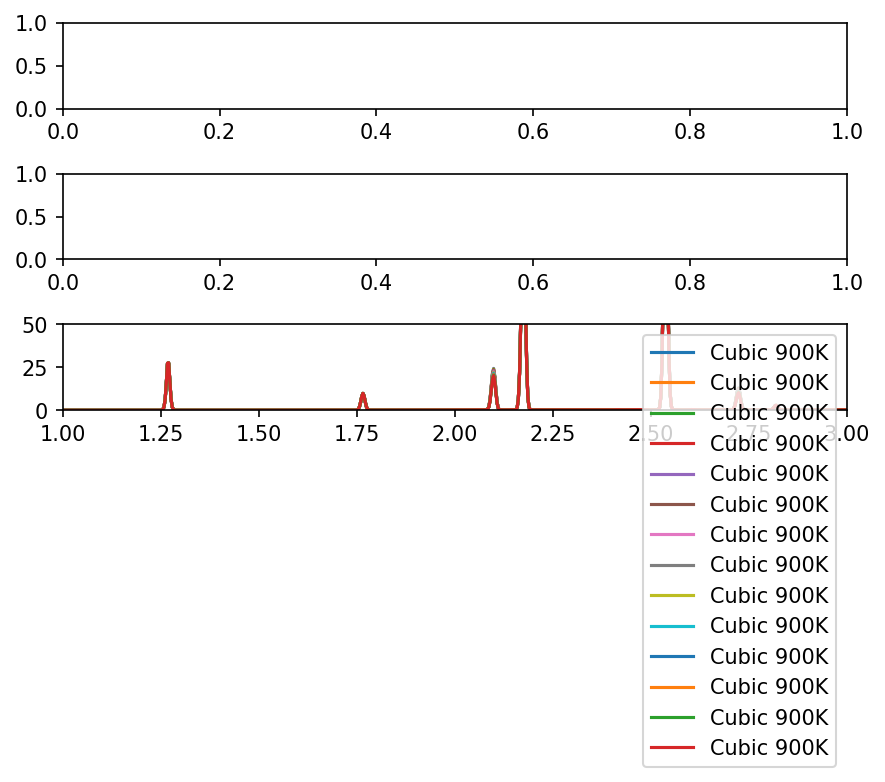

In [238]:
os.system('pwd')
xlim = [0.9, 3]
ylim = [0.0005, 4]
alpha = 0.8

# parameters
q_max = 3.0
q_linspace = np.linspace(0, q_max, 1000)
q_width = 0.1

fig = plt.figure(figsize=(6.0, 4.8), dpi=150)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
q_list = []
Sq_list = []  

structure_tags = ['NVT_tet_size8_T700_nframes1000', 'NVT_tet_size8_T720_nframes1000', 'NVT_tet_size8_T740_nframes1000']
#structure_tags = ['NVT_tet_size8_T700_nframes1000', 'NVT_tet_size8_T720_nframes1000']
for temp in np.arange(620,900,20):
    dirname = f'/Users/w21013885/XRD/md_runs/NVT_tet_size8_T{temp}_nframes1000/'
    if not os.path.exists(f'{dirname}/dump.extxyz'):
        
        os.chdir(f'{dirname}')
        print("here")
        os.system('cp dump.xyz dump.extxyz')
    traj = Trajectory(dirname + 'dump.extxyz', trajectory_format='extxyz')

    # generate all q-points in supercell
    q_points = get_spherical_qpoints(traj.cell, q_max=q_max)
    
    # compute Sq
    sample = compute_static_structure_factors(traj, q_points)
    
    # spherical average over q-points
    data_dict_qwidths = dict()
    for q_width in [0.005]:
    
        sample_averaged = get_spherically_averaged_sample_smearing(sample, q_norms=q_linspace, q_width=q_width)
        data_dict_qwidths[q_width] = sample_averaged.q_norms, sample_averaged.Sq
  
    for q_width, (q, Sq) in data_dict_qwidths.items():
        if tag == 'NVT_tet_size8_T700_nframes1000':
            ax1.plot(q, Sq, '-', label=rf'Ortho 300K')
            ax1.set_ylim(0.0, 50)     
            ax1.set_xlim(1.0, 3.0)     
            ax1.legend(loc='upper right')    
        elif tag == 'NVT_tet_size8_T720_nframes1000':
            ax2.plot(q, Sq, '-', label=rf'Tet 700K')
            ax2.set_ylim(0.0, 50)     
            ax2.set_xlim(1.0, 3.0)     
            ax2.legend(loc='upper right')    
        elif tag == 'NVT_tet_size8_T740_nframes1000':
            ax3.plot(q, Sq, '-', label=rf'Cubic 900K')
            ax3.set_ylim(0.0, 50)     
            ax3.set_xlim(1.0, 3.0)     
            ax3.legend(loc='upper right')
        print(q, type(q), q.shape, "q")
        print(Sq, type(Sq), Sq.shape, "Sq")
        q_list.append(q)
        Sq_list.append(Sq)

fig.tight_layout()
plt.savefig(f'BZS_spherical_average.png')
print(q_list)
print(Sq_list)


In [499]:
q_array = np.array(q_list)
Sq_array = np.array(Sq_list)
import pandas as pd 
df = pd.DataFrame(Sq_array.T[0,:,:])
print(df.shape)
df
df.columns =["620", "640", "660", "680", "700", "720","740", "760", "780", "800", "820", "840", "860", "880"]
df

(1000, 14)


,620,640,660,680,700,720,740,760,780,800,820,840,860,880
0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
1,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
3,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
4,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.199604,0.206244,0.218629,0.223252,0.221214,0.225529,0.234849,0.240872,0.248821,0.251789,0.257189,0.265438,0.269459,0.272167
996,0.206520,0.214563,0.226011,0.230653,0.228731,0.232533,0.244833,0.249620,0.257372,0.261039,0.264858,0.274151,0.279775,0.282030
997,0.208808,0.218113,0.227462,0.231865,0.231382,0.234925,0.249340,0.252783,0.259824,0.264270,0.266261,0.276724,0.283804,0.285414
998,0.207478,0.217792,0.224864,0.229018,0.230341,0.233845,0.248951,0.251568,0.257661,0.262598,0.263444,0.274853,0.282431,0.283488


In [510]:
T =["620", "640", "660", "680", "700", "720","740", "760", "780", "800", "820", "840", "860", "880"]
T = np.array(T)
T.shape

(14,)

In [511]:
q_array[0].shape

(1000,)

In [512]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
620,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,0.170652,0.171877,0.175024,0.181111,0.190008,0.199604,0.206520,0.208808,0.207478,0.204701
640,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,0.174653,0.176187,0.179708,0.186075,0.195531,0.206244,0.214563,0.218113,0.217792,0.215828
660,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,0.179827,0.181663,0.186696,0.195433,0.207063,0.218629,0.226011,0.227462,0.224864,0.220971
680,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,0.185407,0.187261,0.192020,0.200269,0.211633,0.223252,0.230653,0.231865,0.229018,0.225186
700,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,0.190700,0.191393,0.194733,0.201357,0.210899,0.221214,0.228731,0.231382,0.230341,0.227938
720,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,0.194952,0.196124,0.199730,0.206391,0.215707,0.225529,0.232533,0.234925,0.233845,0.231404
740,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,0.199761,0.201119,0.204839,0.211813,0.222455,0.234849,0.244833,0.249340,0.248951,0.246161
760,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,0.203279,0.205513,0.210391,0.218220,0.229060,0.240872,0.249620,0.252783,0.251568,0.248673
780,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,0.209761,0.211466,0.216335,0.224876,0.236573,0.248821,0.257372,0.259824,0.257661,0.253825
800,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,0.215813,0.217398,0.221305,0.228540,0.239451,0.251789,0.261039,0.264270,0.262598,0.258863


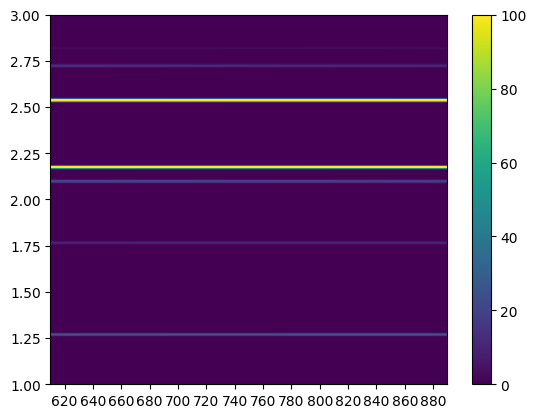

In [519]:
#plt.pcolormesh(q_array[0], T ,df.T)
plt.pcolormesh(T,q_array[0],df)
plt.ylim([1,3])
plt.colorbar()
plt.clim([0,100])